In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')
df.head(2)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
0,236670,Wired Headphones,2,11.99,23.98,08/31/19,22,31,8,2019,Sat,359 Spruce St,Seattle,WA,98101,PM
1,236671,Bose SoundSport Headphones,1,99.99,99.99,08/15/19,15,15,8,2019,Thu,492 Ridge St,Dallas,TX,75001,PM


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   order_id   185950 non-null  int64  
 1   product    185950 non-null  object 
 2   quantity   185950 non-null  int64  
 3   price      185950 non-null  float64
 4   total      185950 non-null  float64
 5   full_date  185950 non-null  object 
 6   hour       185950 non-null  int64  
 7   date       185950 non-null  int64  
 8   month      185950 non-null  int64  
 9   year       185950 non-null  int64  
 10  day        185950 non-null  object 
 11  address    185950 non-null  object 
 12  city       185950 non-null  object 
 13  state      185950 non-null  object 
 14  pincode    185950 non-null  int64  
 15  timezone   185950 non-null  object 
dtypes: float64(2), int64(7), object(7)
memory usage: 22.7+ MB


<div class='alert alert-info'> Q1. What is the 4th highest product sold in terms of total revenue generated overall ?</div>

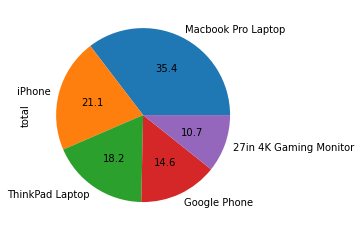

In [4]:
df.groupby('product')['total'].sum().nlargest(5).sort_values(ascending=False).plot(kind='pie', autopct='%0.1f');

- ### Inferences: 
#### The 4th highest product sold in term of total revenue generated is `Google Phone`

<div class='alert alert-info'>Q2. Which City sees the maximum number of orders being placed in the month of June 2019?</div>

In [5]:
df2=df[(df['month']==6) & (df['year']==2019)]
df2.head(2)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
41402,209921,USB-C Charging Cable,1,11.95,11.95,06/23/19,19,23,6,2019,Sun,950 Walnut St,Portland,ME,4101,PM
41403,209922,Macbook Pro Laptop,1,1700.00,1700.00,06/30/19,10,30,6,2019,Sun,80 4th St,San Francisco,CA,94016,AM


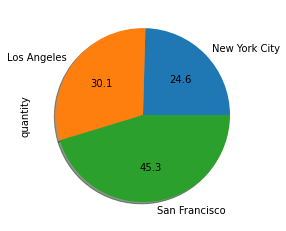

In [6]:
df2.groupby('city')['quantity'].sum().nlargest(3).sort_values().plot(kind='pie', autopct='%0.1f', shadow=True);

- ### Inferences:
#### The maximum number of order being placed in the month of june 2019 is `San-Francisco`

<div class='alert alert-info'>Q3. What is the least popular product in terms of unique orders in the city of Los Angeles. ?</div>

In [7]:
df2=df[df['city']=='Los Angeles']
df2.head(2)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
3,236673,AA Batteries (4-pack),2,3.84,7.68,08/29/19,20,29,8,2019,Thu,631 2nd St,Los Angeles,CA,90001,PM
6,236676,34in Ultrawide Monitor,1,379.99,379.99,08/04/19,19,4,8,2019,Sun,470 Cherry St,Los Angeles,CA,90001,PM


In [8]:
df2.groupby('product')['quantity'].sum().nsmallest(5).sort_values()

product
LG Washing Machine    105
LG Dryer              116
Vareebadd Phone       317
ThinkPad Laptop       641
20in Monitor          658
Name: quantity, dtype: int64

- ### Inferences:
#### The least popular product in the city of Los Angelas is `LG Washing Machine` with the toal order of `105`

<div class='alert alert-info'>Q4. Which state has the highest revenue generated from all the apple products in year 2019?
Hint { Apple products : Apple airpods, iphone, Macbook} </div>

In [9]:
df2=df[(df['year']==2019) & ((df['product']=='Apple Airpods Headphones')| (df['product']=='Macbook Pro Laptop') | (df['product']=='iPhone'))]
df2.head(2)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
2,236672,iPhone,1,700.0,700.0,08/06/19,14,6,8,2019,Tue,149 7th St,Portland,OR,97035,PM
9,236679,Macbook Pro Laptop,1,1700.0,1700.0,08/07/19,15,7,8,2019,Wed,239 Spruce St,Los Angeles,CA,90001,PM


In [10]:
df2.groupby('state')['total'].sum().nlargest(3).sort_values()

state
TX    2013750.0
NY    2047600.0
CA    6082950.0
Name: total, dtype: float64

- ### Inferences:
#### CA has the highest sales of all apple product in total revenue generated

<div class='alert alert-info'>Q5. What is the difference of revenue generated between weekend and weekday in the state of CA ?
Hint { Weekday : Mon – Thu, Weekend : Fri – Sun}</div>

In [11]:
weekday = df[(df['state']=='CA') & ((df['day']=='Mon') | (df['day']=='Tue') | (df['day']=='Wed') | (df['day']=='Thur'))]
weekday.head(2)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
7,236677,20in Monitor,1,109.99,109.99,08/13/19,7,13,8,2019,Tue,918 6th St,San Francisco,CA,94016,AM
9,236679,Macbook Pro Laptop,1,1700.00,1700.00,08/07/19,15,7,8,2019,Wed,239 Spruce St,Los Angeles,CA,90001,PM


In [12]:
weekend = df[(df['state']=='CA') & ((df['day']=='Fri') | (df['day']=='Sat') | (df['day']=='Sun'))]
weekend.head(2)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
5,236675,Wired Headphones,1,11.99,11.99,08/02/19,23,2,8,2019,Fri,470 Hill St,San Francisco,CA,94016,PM
6,236676,34in Ultrawide Monitor,1,379.99,379.99,08/04/19,19,4,8,2019,Sun,470 Cherry St,Los Angeles,CA,90001,PM


In [13]:
weekday['total'].sum() , weekend['total'].sum()

(5993208.2299999995, 5799084.76)

In [14]:
weekday['total'].sum() - weekend['total'].sum()

194123.46999999974

- ### Inferences:
#### The difference of revenue generated between weekend and weekday in the state of CA is `194123.46999999974`

<div class='alert alert-info'> Q6. Which city has seen the overall least orders in night hours in the months of May, June and July 2019. 
Hint { Night Hours : 18 – 24 } </div>

In [15]:
night=df[(df['hour'] >=18 ) & ((df['month']== 5) | (df['month']==6) | (df['month']==7)) & (df['year']==2019)]
night.head(2)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
27116,222915,Bose SoundSport Headphones,1,99.99,99.99,07/03/19,18,3,7,2019,Wed,899 Elm St,San Francisco,CA,94016,PM
27117,222916,Google Phone,1,600.00,600.00,07/21/19,22,21,7,2019,Sun,745 Chestnut St,New York City,NY,10001,PM


In [16]:
night['hour'].sort_values().unique() , df2['month'].unique(), df2['year'].unique()

(array([18, 19, 20, 21, 22, 23], dtype=int64),
 array([ 8,  9,  3,  4,  7,  6, 10, 11,  5, 12,  1,  2], dtype=int64),
 array([2019], dtype=int64))

In [17]:
night.groupby('city')['quantity'].sum().nsmallest(5).sort_values()

city
Austin       822
Portland    1157
Atlanta     1347
Seattle     1349
Dallas      1384
Name: quantity, dtype: int64

- ### Inferences:
#### The city of `Austin` has seen the lowest ordering of `822`

<div class='alert alert-info'>Q7. Is “Google Phone” better performing in respect to overall number of orders placed as well as 
            revenue generated than “iphone” in “New York City” ?</div>

In [18]:
df2=df[(df['product']=='Google Phone') & (df['city']=='New York City')]
df2.head(1)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
62,236730,Google Phone,1,600.0,600.0,08/02/19,10,2,8,2019,Fri,445 Lincoln St,New York City,NY,10001,AM


In [19]:
df2['quantity'].sum(), df2['total'].sum()

(758, 454800.0)

In [20]:
df3=df[(df['product']=='iPhone') & (df['city']=='New York City')]
df3.head(1)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
317,236981,iPhone,1,700.0,700.0,08/05/19,11,5,8,2019,Mon,499 River St,New York City,NY,10001,AM


In [21]:
df3['quantity'].sum(), df3['total'].sum()

(881, 616700.0)

- ### Inferences:
- ### The total number of Google phone sold is `758`, and generated a total revenue of `454800.0$`
- ### The total number of iphone sold is `881`, and enerated the total revenue of `616700.0$`

<div class='alert alert-info'>Q8. What is the absolute difference in total number of unique orders being created in the cities of 
“Boston” and “Portland” for the month of Jan in both years 2019 & 2020 ?</div>

In [22]:
Boston = df[(df['month']==1) & ((df['year']==2019) | (df['year']==2020)) & (df['city']=='Boston')]
Boston.head(1)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
100543,302393,Lightning Charging Cable,1,14.95,14.95,01/01/20,0,1,1,2020,Wed,108 Jefferson St,Boston,MA,2215,AM


In [23]:
Portland=df[(df['month']==1)& ((df['year']==2019) | (df['year']==2020)) & (df['city']=='Portland')]
Portland.head(1)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
102398,304165,AAA Batteries (4-pack),1,2.99,2.99,01/01/20,4,1,1,2020,Wed,825 Adams St,Portland,OR,97035,AM


In [24]:
Boston['product'].nunique(), Portland['product'].nunique()

(19, 18)

- ### Inferences:
#### The Unique product ordered in the city of Boston is `19` & for Portland is `18` for he month of Jan in both years 2019 & 2020

<div class='alert alert-info'>Q9. Plot pie chart for 4 categories based on their total revenue generated. 
Weekend-Day , Weekend-Night, Weekday-Day, Weekday-Night. 
Hint {Weekend/Weekday , Day/Night logic remains as earlier discussed}
</div>

In [25]:
Weekday_Day = weekday[weekday['hour']<18]
Weekday_Day.head(1)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
7,236677,20in Monitor,1,109.99,109.99,08/13/19,7,13,8,2019,Tue,918 6th St,San Francisco,CA,94016,AM


In [26]:
Weekday_Day_Total = Weekday_Day['total'].sum()
Weekday_Day_Total

3992313.3

In [27]:
Weekday_Night = weekday[weekday['hour']>17]
Weekday_Night.head(1)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
43,236713,27in FHD Monitor,1,149.99,149.99,08/05/19,20,5,8,2019,Mon,852 8th St,San Francisco,CA,94016,PM


In [28]:
Weekday_Night_Total = Weekday_Night['total'].sum()
Weekday_Night_Total

2000894.9299999997

In [29]:
Weekend_Day = weekend[weekend['hour']<18]
Weekend_Day.head(1)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
30,236700,Wired Headphones,1,11.99,11.99,08/09/19,8,9,8,2019,Fri,534 North St,Los Angeles,CA,90001,AM


In [30]:
Weekend_Day_Total=Weekend_Day['total'].sum()
Weekend_Day_Total

3803138.9499999993

In [31]:
Weekend_Night = weekend[weekend['hour']>17]
Weekend_Night.head(1)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
5,236675,Wired Headphones,1,11.99,11.99,08/02/19,23,2,8,2019,Fri,470 Hill St,San Francisco,CA,94016,PM


In [32]:
Weekend_Night_Total=Weekend_Night['total'].sum()
Weekend_Night_Total

1995945.8099999998

In [33]:
data = pd.Series([Weekday_Day_Total, Weekday_Night_Total, Weekend_Day_Total, Weekend_Night_Total], index=['Weekday_Day',
                                                                                                       'Weekday_Day',
                                                                                                       'Weekend_Day',
                                                                                                       'Weekend_Night'])
data

Weekday_Day      3992313.30
Weekday_Day      2000894.93
Weekend_Day      3803138.95
Weekend_Night    1995945.81
dtype: float64

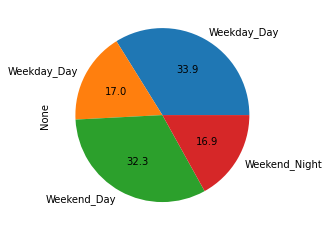

In [34]:
data.plot(kind='pie', autopct='%0.1f');